<img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg">

<center> <font color= #004A94> <font size = 6> Msc Ciencia de datos </font> <br> <br> <font color= #047CFB> <font size = 5>I.F. Juan Francisco Muñoz Elguezabal - franciscome@iteso.mx </font>

---

<center><font color=#004A94><font size=4> Proyecto final de: </font> <br> <br>
    
<center><font color=#004A94><font size=7> ANÁLISIS ESTADÍSTICO MULTIVARIABLE </font> <br> <br> <br> 

<center><font color=#42c29b><font size=6> Una comparación entre modelos regresivos lineales y clustering secuencial como predictores de series de tiempo financieras </font> <br> <br>
   
<center> <font color= #047CFB> <font size = 4> Repositorio: <a href='https://github.com/IFFranciscoME/FinTechLab/tree/master/'>Link</a></font>

In [1]:
import warnings                                        # Tratamiento de warnings
import plotly                                          # Visualizacion de datos
import pandas as pd                                    # dataframes y utilidades

import plotly.offline as py                            # para visualizar plots de plotly offline
py.offline.init_notebook_mode(connected=False)         # Inicializar modalidad offline para visualizar plots

from principal import *                                # importar objetos para mostrar
from IPython.display import Markdown as md             # poner variables de python embebidas en markdown

warnings.filterwarnings('ignore')                      # Deshabilitar todos los warnings
pd.set_option('display.max_rows', None)                # sin limite de renglones maximos para mostrar pandas
pd.set_option('display.max_columns', None)             # sin limite de columnas maximas para mostrar pandas
pd.set_option('display.width', None)                   # sin limite el ancho del display
pd.set_option('display.expand_frame_repr', False)      # visualizar todas las columnas de un dataframe
pd.options.mode.chained_assignment = None              # para evitar el warning enfadoso de indexacion

/home/franciscome/.local/lib/python3.6/site-packages/mass_ts/_mass_ts.py:18: UserWarning:

GPU support will not work. You must pip install mass-ts[gpu].



## Introducción

Este trabajo es realizado como proyecto final muestra para la materia de Análisis Estadístico Multivariable, cursada en el periodo de Otoño 2019. Esta materia es parte del posgrado Maestría en Ciencia de Datos ofertado en la universidad ITESO. Los temas y modelos abordados en este trabajo fueron:

- Regresión Lineal Multivariada.
- Principal Component Analysis (PCA).
- ANOVA.
- Clustering.

## Extras

- **Investigación reproducible**: Jupyter Notebook, Git para control de versiones, estándar *pep8* de identación
- **BigData**: Serie de tiempo de 3.9 millones de datos, 296,000 datos atemporales.
- **Clustering secuencial para series de tiempo**: *Mueen's Algorithm for Sequential Similarity : MASS*
- **Procesamiento en Paralelo**: Con ayuda de librerías, funciones procesadas en 4 nucleos.
- **Programación eficiente vectorizada**: Compresión de listas-diccionarios, lambdas, arreglos.
- **Visualización de datos**: Plotly para visualización interactiva de datos.

## Scripts y Notebooks

Con el objetivo de modularizar el proyecto, se dividieron los códigos en 4 scripts y se hizo un notebook para cada uno.

- *aem_proyecto_slides.html* : Es ésta presentación.
- **principal.py** : Script general donde se corre el flujo del proyecto.
- *aem_proyecto_principal.html* : Flujo explicativo de script *principal.py* .
- **funciones.py** : Script con funciones de procesamiento de datos y los meta modelos.
- *aem_proyecto_funciones.html* : Flujo explicativo de script *funciones.py*.
- **datos.py** : Ingesta y pre-procesamiento de datos masivos.
- *aem_proyecto_datos.html* : Flujo explicativo de script *datos.py*.
- **visualizaciones.py** :Visualización de datos.
- *aem_proyecto_visualizaciones.html* : Flujo explicativo de script *visualizaciones.py*.

## Problemática propuesta


Construir un predictor del tipo de cambio Eur/Usd utilizando.
- RLM + PCA.

Búsqueda de patrones en la reacción del tipo de cambio Eur/Usd ante indicadores macroeconómicos de las economías de USA y Zona Euro.
- ANOVA + Clustering Secuencial en Series de Tiempo.

## Archivos de datos

Precios históricos, en formato OHLC (*Open*, *High*, *Low*, *Close*), del tipo de cambio Euro Vs Dólar americano, tomados con una periodicidad de cada 1 minuto y cada semana, para las fechas de *2009-01-06 00:00:00* hasta *2019-12-06 00:00:00*

- **Eur_Usd_M1.csv** : 15 millones de precios
- **Eur_Usd_W.csv** : 2,300 precios

Información de comunicación histórica de indicadores macroeconómicos para las economías de USA, Zona Euro, Alemania y Francia, para las fechas de *2009-01-06 00:00:00* hasta *2019-12-06 00:00:00*.

- **Calendario_Economico.csv** : 263 mil datos

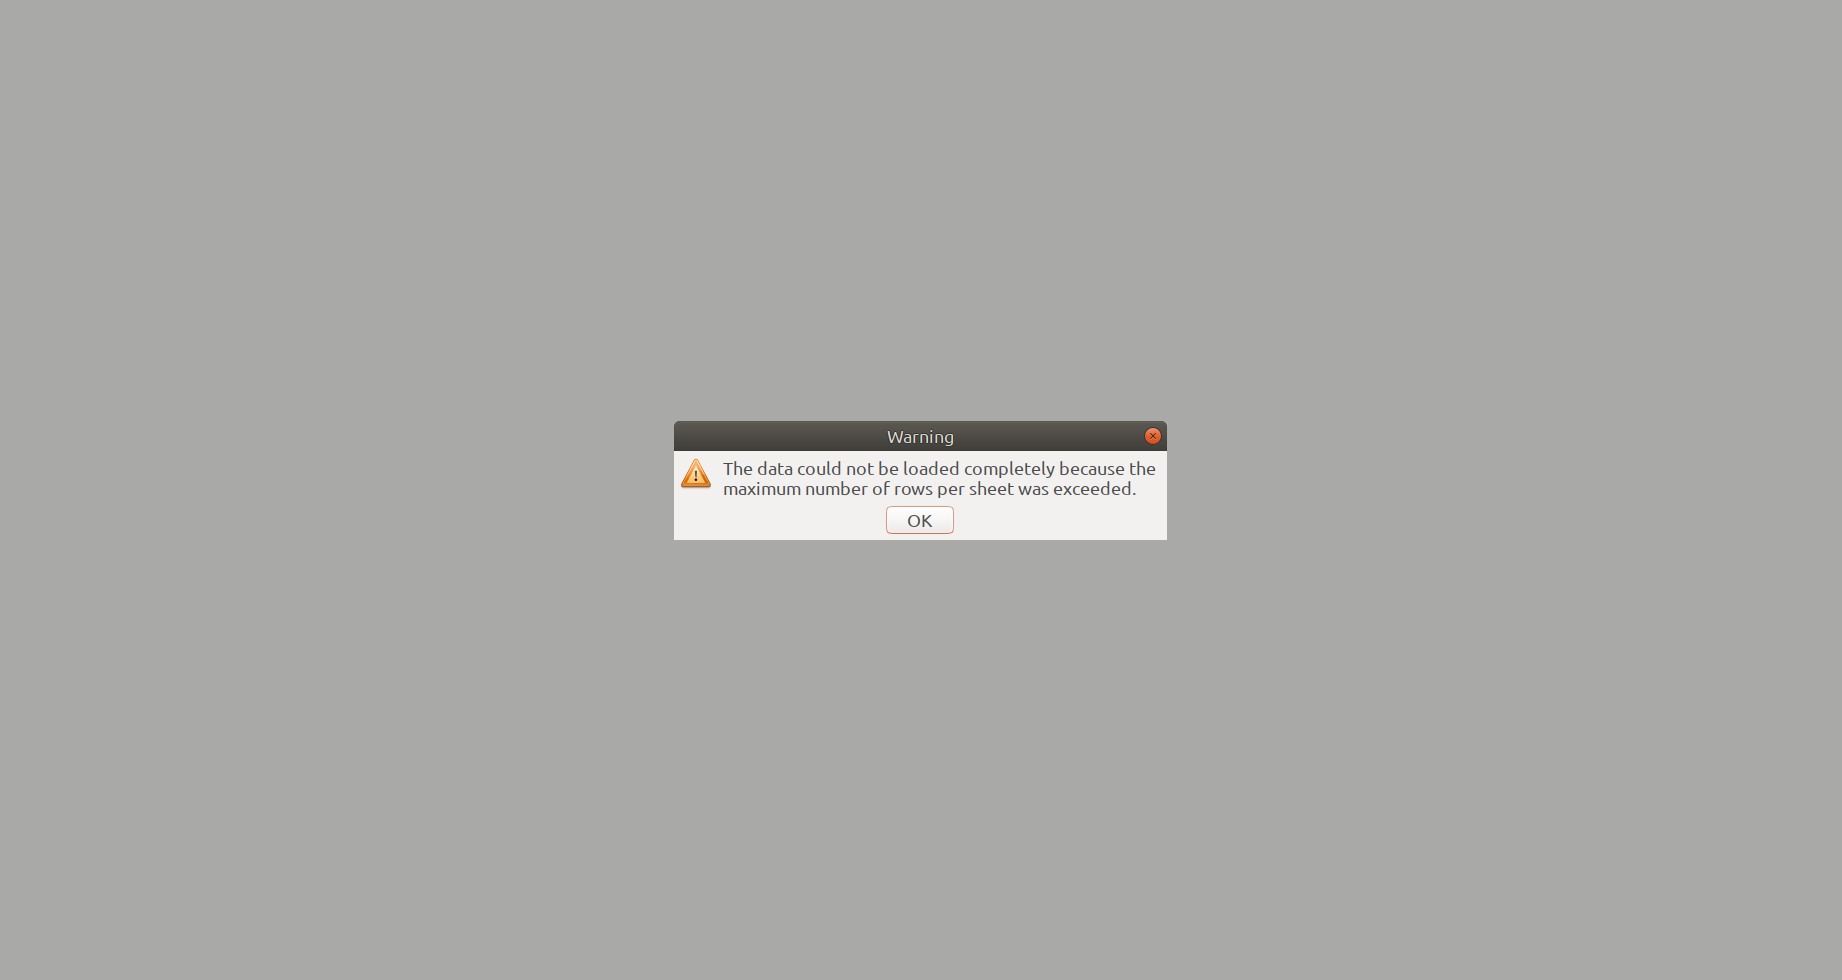

In [21]:
from IPython.display import Image
Image(filename='imagenes/imagen_BigData.png') 

## Gráfica de histórico general (precios semanales)

In [2]:
plotly.offline.init_notebook_mode(connected=True)
py.iplot(g1)

## DataFrame de precios

In [3]:
### Tabla con precios OHLC SEMANALES
slides_df1

timestamp     open     high      low    close
1 2009-01-09 21:00:00+00:00  1.34309  1.34870  1.30262  1.32899
2 2009-01-16 21:00:00+00:00  1.32895  1.33865  1.27666  1.29865
3 2009-01-23 21:00:00+00:00  1.29863  1.33305  1.27778  1.28044
4 2009-01-30 21:00:00+00:00  1.28043  1.30698  1.27040  1.29254
5 2009-02-06 21:00:00+00:00  1.29257  1.30940  1.27214  1.28808
6 2009-02-13 21:00:00+00:00  1.28808  1.28853  1.25134  1.28360

In [4]:
### Tabla con precios OHLC POR MINUTO
slides_df2

timestamp     open     high      low    close
1 2009-01-06 05:01:00+00:00  1.35448  1.35455  1.35383  1.35455
2 2009-01-06 05:02:00+00:00  1.35453  1.35530  1.35440  1.35486
3 2009-01-06 05:03:00+00:00  1.35487  1.35510  1.35387  1.35425
4 2009-01-06 05:04:00+00:00  1.35425  1.35459  1.35415  1.35439
5 2009-01-06 05:05:00+00:00  1.35443  1.35454  1.35424  1.35436
6 2009-01-06 05:06:00+00:00  1.35438  1.35464  1.35431  1.35449

## DataFrame de calendario económico

In [5]:
### Tabla con precios OHLC POR MINUTO
slides_df3

timestamp Currency                                  Name                  Country  Volatility   actual  previous  consensus
27 2009-02-03 10:00:00+00:00      EUR        EUR Producer Price Index (MoM)  European Monetary Union           1   -1.500     -2.10       -1.2
28 2009-02-05 13:30:00+00:00      USD            USD Initial Jobless Claims            United States           1  631.000    588.00      592.0
29 2009-02-06 11:00:00+00:00      EUR  EUR Industrial Production s.a. (MoM)                  Germany           2   -3.730     -4.40       -2.5
30 2009-02-06 13:30:00+00:00      USD                 USD Unemployment Rate            United States           3    7.600      7.20        7.5
31 2009-02-09 07:00:00+00:00      EUR                EUR Trade Balance s.a.                  Germany           2   10.499     15.84       10.0
32 2009-02-11 07:00:00+00:00      EUR        EUR Consumer Price Index (MoM)                  Germany           2   -0.500     -0.50       -0.5
33 2009-02-11 07:00:00+00:00      EUR        EUR Consumer Price Index (YoY)                  Germany           2    0.900      0.90        0.9
34 2009-02-12 10:00:00+00:00      EUR  EUR Industrial Production s.a. (MoM)  European Monetary Union           1   -4.500     -3.00       -2.5

## Meta Modelo Regresivo: RLM-EX + PCA

RLM con variables endógenas y reducción de dimensionalidad con PCA.
- Ingeniería de variables endógenas de la serie de tiempo.
- *Con información para fechas desde 2009-01-06 00:00 GMT hasta 2019-12-06 00:00 GMT*
- *Precios semanales del Eur/Usd*

### Separación de dataset
- Entrenamiento: 80%
- Prueba: 20%

### Transformación de variables de entrada
- Logaritmo a variables ind (lag).
- Estandarización a variables ind (todas).

## Variables

**Variable Dependiente:** La diferencia entre el precio de cierre y el precio de apertura de la semana, expresada en términos de *pips*, que significa la *diezmilésima de la unidad*, debido a que es un mercado apalancado.

- *y:* (close - open)*10,000

**Variables independientes:** Resagos y promedios móviles de la serie, junto con algunas transformaciones. Los periodos utilizados para estos fueron calculados con ACF y PACF, con un reságo máximo de 12 (semanas).

- *x_n:* lag_ho_n, lag_ol_n, ma_ho_n, ma_ol_n

## Dataframes con variables

In [6]:
slides_df4

co        ho        ol
timestamp                                           
2009-03-20 20:00:00+00:00 -267.2  0.521792  1.766012
2009-03-27 20:00:00+00:00  189.3  1.031339  0.581670
2009-04-03 20:00:00+00:00 -311.2 -0.244583  2.590275

In [7]:
slides_df5

co  lag_ho_1   ma_ho_2  lag_ol_1   ma_ol_2  lag_ho_2   ma_ho_3  lag_ol_2   ma_ol_3
timestamp                                                                                                       
2009-03-20 20:00:00+00:00 -267.2  2.209432  5.093035 -0.033035  0.846122  1.311438  4.900919  0.009601  0.442578
2009-03-27 20:00:00+00:00  189.3  0.715828  1.009285  1.194138  1.506282  2.203299  4.381200 -0.034154  0.926135
2009-04-03 20:00:00+00:00 -311.2  0.957882  0.506400  0.740581  2.035268  0.711527  0.635936  1.193426  2.407554

## Criterios AIC y BIC

Son dos criterios de uso frecuente para la selección de modelos.

- **AIC**: Akaike information criterion
Considera un trade-off entre la bondad de ajuste del modelo y la complejidad del modelo. 
- **BIC**: Bayesian information criterion
criterio de evaluación de modelos en términos de sus probabilidades posteriores. Se interpreta como la probabilidad de que los datos sean generados por el modelo $M_i$

**Nota**: Entre algunas de las primeras aplicaciones del AIC sugeridas por el autor de éste índice, Akaike, se encuentran el análisis de componentes principales, regresión m´ultiple y series de tiempo.

## Resultados Modelo 1: RLM-END

In [8]:
m1

conjunto      aic      bic  params      mse      r2
0    train  5130.36  5323.08      47  4695.78  0.8351
1     test  1217.84  1345.61      47  1334.64  0.8438

El modelo inicial fue ajustado con **47 variables independientes (no todas significativas)**, sin embargo se generó un valor de $r² > 0.83$, para ambos conjuntos de datos. El **MSE resultó alto, debido a que recordemos que se multiplicó por 10,000 todas las $y$ y las $x_i$**, por lo tanto era de esperarse que la variación del error cuadrático promedio también escalara en la misma proporción. Es un modelo con alta dimensionalidad, se buscará reducir utilizando el PCA.

## Reducción de dimensionalidad con PCA

Se utilizó la técnica de Análisis de Componentes Principales (PCA) para buscar reducir la dimensionalidad del modelo, esperando también no perder mucho poder explicativo y buscar reducir o mantener los valores de *AIC*, *BIC* y *MSE*.

In [9]:
md("Se buscó utilizar las variables que explicaran el siguiente % de la variabilidad: " + str(m2_p))

Se buscó utilizar las variables que explicaran el siguiente % de la variabilidad: 0.85

In [10]:
md("Las dimensiones a las que se redujo el modelo fueron: " + str(m2_d))

Las dimensiones a las que se redujo el modelo fueron: 20

## Resultados Modelo 2: RLM-END-PCA

Los resultados con el nuevo modelo después de utilizar el PCA fueron:

In [11]:
m3

conjunto      aic      bic  params      mse      r2
0    train  5158.81  5244.92      21  5623.96  0.8026
1     test  1215.15  1272.24      21  2072.85  0.7574

Se puede observar que el *MSE* aumentó, el valor de $r²$ disminuyó aunque sigue estando en un rango *aceptable*. La dimesionalidad se redujo por mitad, resultados de medios a moderadamente negativos. Sin embargo, es útil notar que los valores de *BIC* y *AIC*, ambos, disminuyeron, lo que significa que: El ratio entre la bondad de ajuste del modelo Vs la complejidad del modelo mejoró. Por lo tanto, se considera que el modelo ganó mas *explicabilidad* y *simpleza* de lo que perdió en *ajuste* y *mse*. 

## Meta Modelo Clustering: STSC-MASS

Clustering secuencial de series de tiempo utilizando *MASS*
- *Con información para fechas desde 2009-01-06 00:00 GMT hasta 2019-12-06 GMT*
- *Calendario económico para USA y Zona Euro*
- *Precios de cada minuto del Eur/Usd*

## Teoría

Fue necesario buscar algo de literatura para clustering aplicado a series de tiempo. 

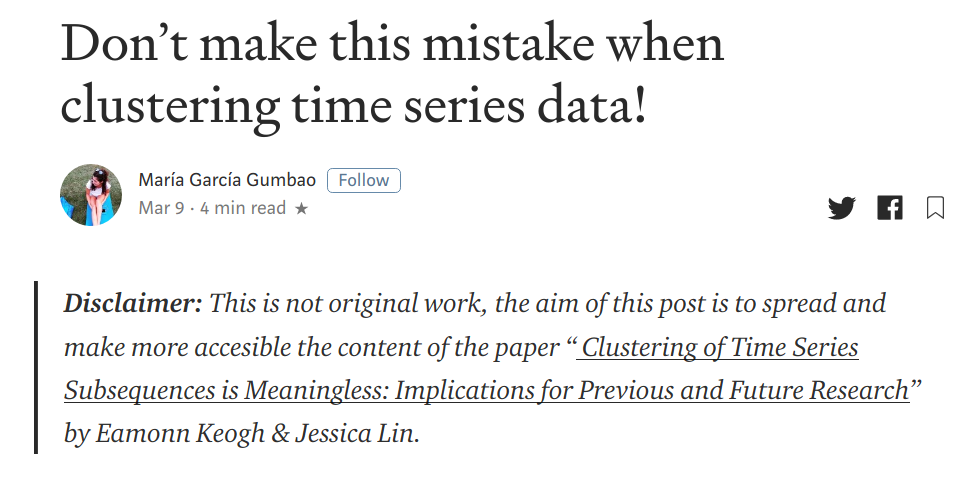

In [12]:
from IPython.display import Image
Image(filename='imagenes/imagen0_comienzo.png') 

## Secuential Time Series Clustering - Time Series Mining

La minería de series de tiempo, y en particular de *Motifs*, significa extraer patrones recurrentes previamente desconocidos en la serie de tiempo.

**Motif**: Subsecuencias de datos, no superpuestas, que presentan *alta similitud* entre ellas. Los parámetros que los definen son:
- *Longitud*: Cantidad de observaciones que componen la *ventana de datos*.
- *Soporte*: Indicativo de cantidad de veces que se presenta.
- ***Similitud*: índice de similitud entre patrones.**
- *Posición relativa*: Posición del patrón dentro de la serie de tiempo.

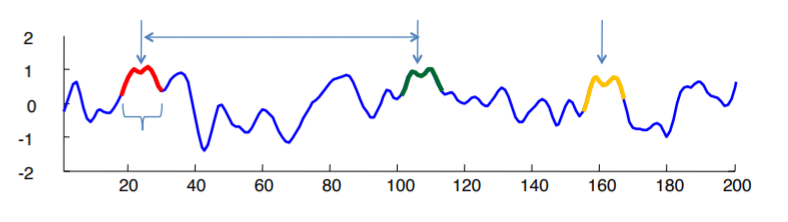

In [13]:
from IPython.display import Image
Image(filename='imagenes/imagen1_motif.png') 

## La nueva medida de similitud

Dadas dos series de tiempo: $x = x_{1}, x_{2}, x_{3}, ..., x_{n}$, $y = y_{1}, y_{2}, y_{3}, ..., y_{n}$

La distancia Euclideana z-normalizada entre ellas se define como:

$\hat{x} = \frac{x_{i}-\mu_{x}}{\sigma_{x}} , \hat{y} = \frac{y_{i}-\mu_{y}}{\sigma_{y}}$

$d(x,y) = \sqrt{\sum_{i=1}^{n}(\hat{x_{i}} -\hat{y_{i}})^{2})}$

## la nueva medida de similitud

Dadas dos series de tiempo $x$ y $y$, ambas de longitud $m$:

$$corr(x,y) = \frac{(E[x] - \mu_{x})(E[y] - \mu_{y})}{\sigma_{x}\sigma_{y}} = \frac{\sum_{i=1}^{m} x_{i}y_{i} - m \mu_x \mu_y}{m\sigma_x \sigma_y}$$

donde:
$$\mu_x = \sum_{i=1}^{m}\frac{x_i}{m} \quad y \quad \sigma_{x}^{2} = \sum_{i=1}^{m}\frac{x_{i}^{2}}{m} - \mu_{x}^{2}$$ 

Llegando a:
$$d(\hat{x}, \hat{y}) = \sqrt{2m(1- corr(x,y)} \quad = \quad  \sqrt{2m(1- \frac{\sum_{i=1}^{m} x_{i}y_{i} - m \mu_x \mu_y}{m\sigma_x \sigma_y}})$$

Se utiliza entonces a $d(\hat{x}, \hat{y})$ como medida de similitud, así que escencialmente todo los datasets que se analicen bajo este esquema deben de tener todas sus sub-secuencias z-normalizadas (estandarizadas).


## Las relaciones útiles para clasificación.

- Maximizar el coeficiente de correlación puede ser logrado al minizar la distancia Euclideana z-normalizada, y viceversa.


- Maximizar el coeficiente de correlación hará que el término dentro de la raíz sea menor y por lo tanto la distancia entre las series de tiempo, *motifs*, también.


- El producto punto de $\sum_{i=1}^{m} x_{i}y_{i}$ hace eficiente el cómputo del término, ya que las demás son operaciones con escalares.

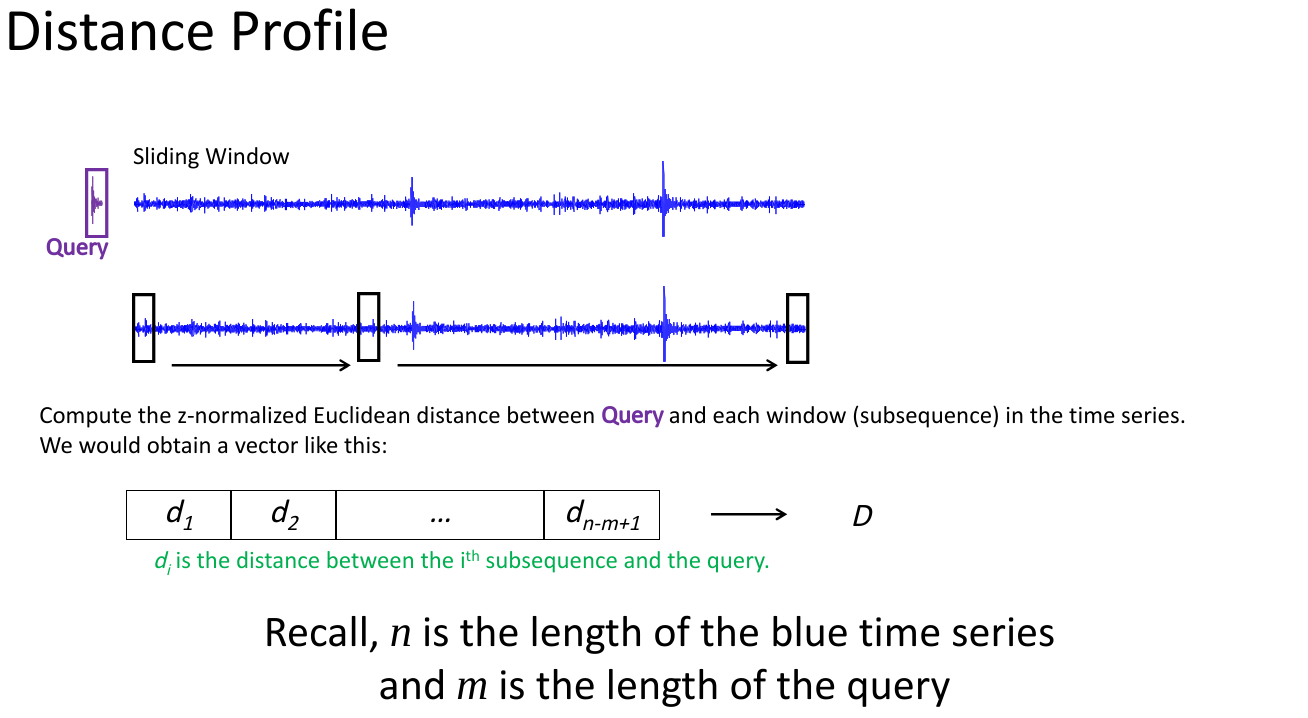

In [14]:
from IPython.display import Image
Image(filename='imagenes/imagen4_distancia.png') 

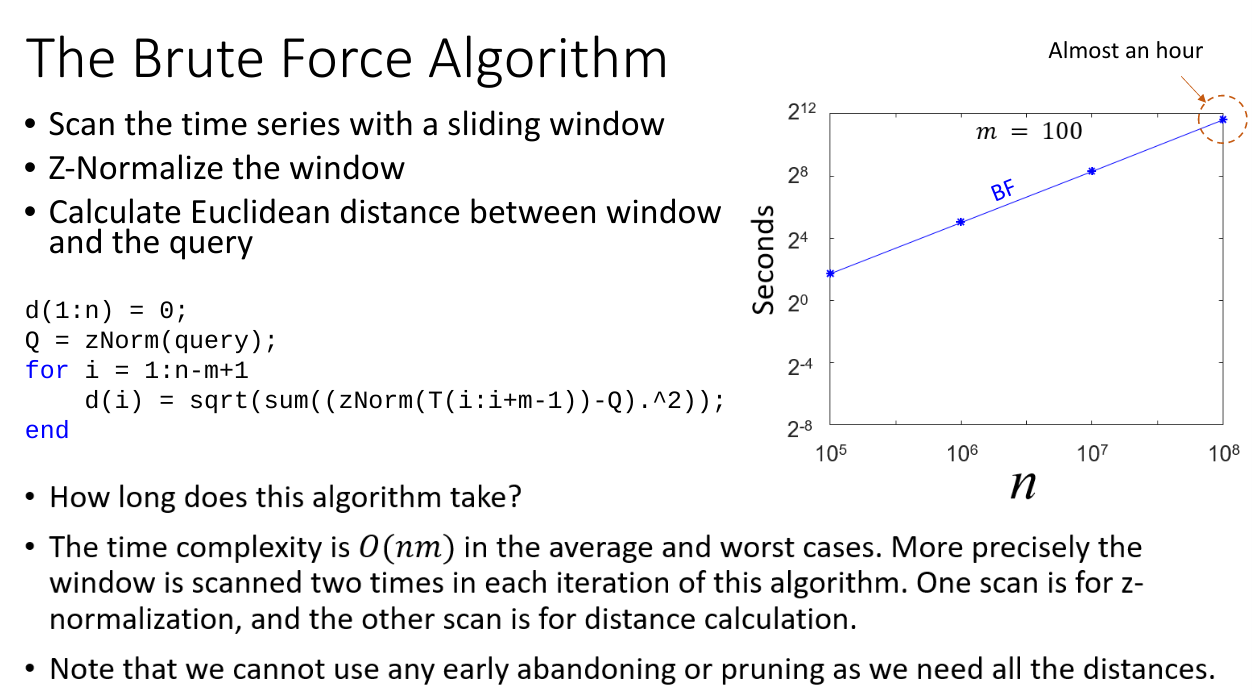

In [15]:
from IPython.display import Image
Image(filename='imagenes/imagen5_fuerza.png') 

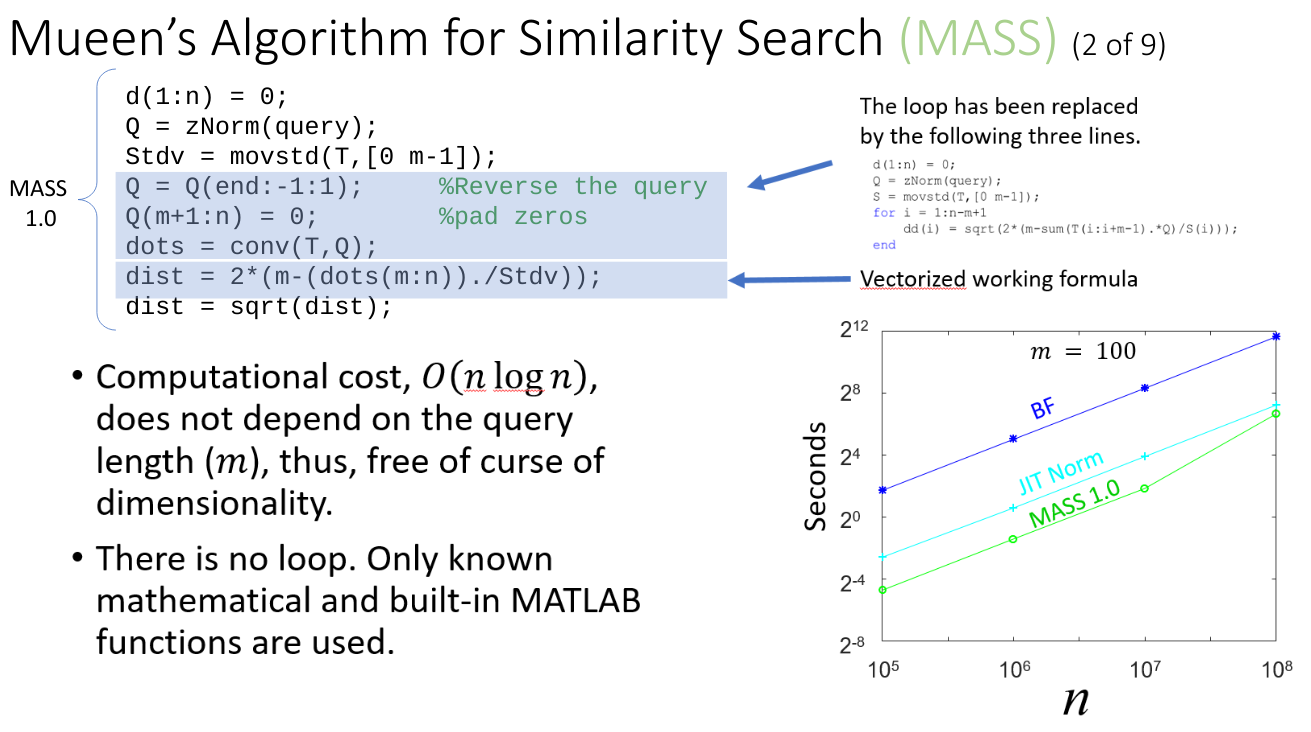

In [16]:
from IPython.display import Image
Image(filename='imagenes/imagen6_mass.png') 

# DE NUEVO
### Meta Modelo Clustering: STSC-MASS

Clustering secuencial de series de tiempo utilizando *MASS, **para buscar repetición de patrones en la serie de precios**:
- *Con información para fechas desde 2009-01-06 00:00 GMT hasta 2019-12-06 00:00 GMT*
- *Calendario económico para USA y Zona Euro*
- *Precios de cada minuto del Eur/Usd*
- *Reacción del precio después del comunicado**

## Calendario económico

Registro donde se dan a conocer los indicadores macroeconómicos que serán comunicados en las próximas fechas. Los parámetros a destacar son:

- Cada indicador tiene un índice de *volatilidad* como sugerencia de impacto al precio.
- *actual*: es el valor presente comunicado.
- *previous*: es el valor inmediato anterior comunicado.
- *consensus*: es el valor esperado por varios ejecutivos y organos de gobierno entrevistados.
- *ho*, *ol*, *co*: Son, respectivamente, las *reacciones* del precio calculadas. 

In [17]:
df3[1:]

timestamp Currency                                  Name                  Country  Volatility  actual  previous  consensus mes     ho     ol     co escenario
4 2009-01-08 10:00:00+00:00      EUR               EUR Consumer Confidence  European Monetary Union           2   -30.8     -26.4      -26.0  01    0.0   29.6   19.1         D
5 2009-01-08 13:30:00+00:00      USD            USD Initial Jobless Claims            United States           2   467.0     491.0      540.0  01  124.2   17.0   15.2         D
6 2009-01-09 11:00:00+00:00      EUR  EUR Industrial Production s.a. (MoM)                  Germany           2    -4.4      -2.1       -2.0  01    6.0   38.0   24.8         D
7 2009-01-09 13:30:00+00:00      USD                 USD Unemployment Rate            United States           3     7.2       6.7        7.0  01   43.8  122.2  133.0         A

## Escenarios propuestos

El criterio para generar *escenarios*, a manera de clasificaciones de resultados, fue el siguiente:

| Escenario |                               Regla                              |
|:---------:|:----------------------------------------------------------------:|
|     A     | actual >= previous & actual >= consensus & consensus >= previous |
|     B     | actual >= previous & actual >= consensus & consensus < Precious  |
|     C     | actual >= previous & actual < consensus & consensus >= previous  |
|     D     | actual >= previous & actual < consensus & consensus < previous   |

## Gráfica de ejemplo de reacción del precio

In [18]:
plotly.offline.init_notebook_mode(connected=True)
py.iplot(g2)

## ANOVA

Se diseño un experimento con **ANOVA** para saber si es conveniente utilizar la comunicación de indicadores economicos como "evento disparador" que genera los patrones en las series de tiempo. Esto para el mismo escenario, 4 batches.

- H0: No hay diferencia significativa entre las medias de las reacciones.
- Ha: Si hay diferencia significativa entre las medias de las reacciones.

Se partieron las frecuencias de los escenarios en 4 grupos, se hizo la prueba de *ANOVA* para la reacción del precio *(co) o close-open* y se obtuvieron los siguientes resultados:

## Indicadores que pasaron el ANOVA

Los indicadores que con un 95% de nivel de confianza se aceptó la H0: No hay diferencia significativa entre las medias de las reacciones. Fueron los siguientes:

In [19]:
df4

indicador escenario
0                    EUR Import Price Index (MoM)         D
1   EUR Harmonized Index of Consumer Prices (YoY)         A
2   EUR Harmonized Index of Consumer Prices (MoM)         A
3                        EUR Markit PMI Composite         A
4                  USD Producer Price Index (MoM)         A
5                      USD Initial Jobless Claims         D
6              USD EIA Natural Gas Storage Change         A
7                           USD Unemployment Rate         A
8                  USD Consumer Price Index (YoY)         A
9                           EUR Unemployment Rate         A
10                        USD Consumer Confidence         A
11                 USD Consumer Price Index (MoM)         A
12                         EUR Trade Balance s.a.         A
13                       USD Markit PMI Composite         A
14                 USD Producer Price Index (YoY)         A
15                   USD Import Price Index (MoM)         A

## Caso particular

Se trabajo con el índice de confianza del consumidor, *USD Consumer Confidence*, ya que es un indicador de suma importancia para una economía basada en consumo como lo es la de *USA*. El algoritmo de búsqueda del patron de reacción del precio ante el comunicado de este indicador, fue el siguiente:

1. Se define una ventana de 30 precios de 1 min (30 minutos de tiempo).
2. Se toma la fecha de la primera ocurrencia del indicador con escenario *A*.
3. Se define el *motif* la serie de tiempo *co* posterior al comunicado del indicador para la fecha elegida.
4. Se busca en todas las fechas de los precios el *motif* definido y se regresan los 100 casos mas similares.
5. Se busca si alguno de los 100 casos coincide con las fechas de otros comunicados.
6. En caso de haber coincidencias, se guarda el registro de fecha.
7. se repite todo el proceso para la siguiente fecha del comunicado del mismo indicador y mismo escenario.

## Porcion de código para STSC-MASS

In [22]:
# tamaño de ventana para iterar la busqueda = tamaño de query
batch_size = p_ventana*100
# regresar los Top X casos que "mas se parezcan" = Cantidad total de publicaciones de indicador
top_matches = 100
# regresar los indices y las distancias
mass_indices, mass_dists = mts.mass2_batch(serie, serie_q, batch_size=batch_size,
                                           top_matches=top_matches, n_jobs=3)

# obtener las fechas de los indices regresados fecha inicial del motif detectado y
# fecha final segun amplitud p_ventana.
mass_fechas = [p_precios['timestamp'][mass_indices[i]] for i in range(0, len(mass_indices))]

# cada cada fecha propuesta por el MASS como fecha inicial de un motif con similitud, revisar si
# esta fecha propuesta coincide con otra fecha de publicación de indicador con el mismo escenario
fecha_encontrada = list()
for k in range(0, len(mass_fechas)):
    encuentros = [i for i, j in enumerate(list(sub_datos['timestamp'])) if j == mass_fechas[k]]
    if len(encuentros) != 0 and mass_fechas[k] != fecha_ini:
        fecha_encontrada.append(mass_fechas[k])  # mismo patron entre precios y serie_q con mass

fechas.append(fecha_encontrada)

## Resultados de patrones secuenciales encontrados.

Para los **15** indicadores y sus escenarios, se buscaron entre **50** y **80** fechas donde se publicaron y el resultado fue el escenario mencionado. Se guardaron las fechas donde el patrón del precio cuando el indicador se publicó y se encontró, en otro momento de publicación en otra fecha, un patrón **similar**. 

El indicador con mas coincidencias de *motifs* fue el de: *USD Initial Jobless Claims*, con 12 fechas encontradas como *similares*. A continuación se presenta una gráfica de una de ellas.

## Gráfica muestra de un patrón encontrado

In [20]:
g3